# Predicting Best Defenses of 2025

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Loading in the data
df_2021 = pd.read_csv('/content/Best NFL Defense - 2021.csv')
df_2022 = pd.read_csv('/content/Best NFL Defense - 2022.csv')
df_2023 = pd.read_csv('/content/Best NFL Defense - 2023.csv')
df_2024 = pd.read_csv('/content/Best NFL Defense - 2024.csv')

In [3]:
# Merging datasets
merged_def = df_2021.merge(df_2022, on='Team', how='outer', suffixes=('_2021', '_2022')) \
    .merge(df_2023, on='Team', how='outer', suffixes=('', '_2023')) \
    .merge(df_2024, on='Team', how='outer', suffixes=('', '_2024'))


In [4]:
merged_def.columns

Index(['Team', 'FR TD_2021', 'SFTY_2021', 'INT TD_2021', 'Sck_2021',
       'Comb_2021', 'Asst_2021', 'Solo_2021', 'FF_2021', 'FR_2021',
       'FR TD.1_2021', 'Rec FUM_2021', 'Rush FUM_2021', 'INT_2021',
       'INT TD.1_2021', 'INT Yds_2021', 'Lng_2021', 'FR TD_2022', 'SFTY_2022',
       'INT TD_2022', 'Sck_2022', 'Comb_2022', 'Asst_2022', 'Solo_2022',
       'FF_2022', 'FR_2022', 'FR TD.1_2022', 'Rec FUM_2022', 'Rush FUM_2022',
       'INT_2022', 'INT TD.1_2022', 'INT Yds_2022', 'Lng_2022', 'FR TD',
       'SFTY', 'INT TD', 'Sck', 'Comb', 'Asst', 'Solo', 'FF', 'FR', 'FR TD.1',
       'Rec FUM', 'Rush FUM', 'INT', 'INT TD.1', 'INT Yds', 'Lng',
       'FR TD_2024', 'SFTY_2024', 'INT TD_2024', 'Sck_2024', 'Comb_2024',
       'Asst_2024', 'Solo_2024', 'FF_2024', 'FR_2024', 'FR TD.1_2024',
       'Rec FUM_2024', 'Rush FUM_2024', 'INT_2024', 'INT TD.1_2024',
       'INT Yds_2024', 'Lng_2024'],
      dtype='object')

# Cleaning the data

In [5]:
# Updating column names for clarity
merged_def = merged_def.rename(columns={'FR TD.1_2021': 'FR TD_2021', 'INT TD.1_2021': 'INT TD_2021',
                             'FR TD.1_2022': 'FR TD_2022', 'INT TD.1_2022': 'INT TD_2022',
                             'FR TD.1_2023': 'FR TD_2023', 'INT TD.1_2023': 'INT TD_2023',
                             'FR TD.1_2024': 'FR TD_2024', 'INT TD.1_2024': 'INT TD_2024',
                             })

In [6]:
merged_def.head()

,Team,FR TD_2021,SFTY_2021,INT TD_2021,Sck_2021,Comb_2021,Asst_2021,Solo_2021,FF_2021,FR_2021,...,Solo_2024,FF_2024,FR_2024,FR TD_2024,Rec FUM_2024,Rush FUM_2024,INT_2024,INT TD_2024,INT Yds_2024,Lng_2024
0,49ers,0.0,0.0,2.0,48.0,1053.0,381.0,680.0,22.0,11.0,...,635.0,13.0,6.0,0.0,4.0,8.0,11.0,1.0,167.0,45T
1,Bears,1.0,1.0,1.0,49.0,1014.0,353.0,672.0,14.0,8.0,...,625.0,17.0,13.0,0.0,6.0,5.0,11.0,1.0,87.0,43T
2,Bengals,1.0,0.0,1.0,42.0,1064.0,381.0,676.0,17.0,8.0,...,634.0,14.0,10.0,0.0,2.0,9.0,15.0,2.0,249.0,51T
3,Bills,0.0,0.0,1.0,42.0,954.0,293.0,614.0,12.0,11.0,...,623.0,18.0,16.0,1.0,4.0,11.0,16.0,2.0,145.0,31
4,Broncos,0.0,0.0,1.0,36.0,999.0,362.0,617.0,6.0,6.0,...,648.0,12.0,9.0,2.0,4.0,7.0,15.0,3.0,430.0,100


In [7]:
# Checking for NULL values
merged_def.isnull().sum()

,0
Team,0
FR TD_2021,1
SFTY_2021,1
INT TD_2021,1
Sck_2021,1
...,...
Rush FUM_2024,1
INT_2024,1
INT TD_2024,1
INT Yds_2024,1


In [8]:
# Filling in NULL values with 0
merged_def.fillna(0, inplace=True)

In [9]:
merged_def.columns

Index(['Team', 'FR TD_2021', 'SFTY_2021', 'INT TD_2021', 'Sck_2021',
       'Comb_2021', 'Asst_2021', 'Solo_2021', 'FF_2021', 'FR_2021',
       'FR TD_2021', 'Rec FUM_2021', 'Rush FUM_2021', 'INT_2021',
       'INT TD_2021', 'INT Yds_2021', 'Lng_2021', 'FR TD_2022', 'SFTY_2022',
       'INT TD_2022', 'Sck_2022', 'Comb_2022', 'Asst_2022', 'Solo_2022',
       'FF_2022', 'FR_2022', 'FR TD_2022', 'Rec FUM_2022', 'Rush FUM_2022',
       'INT_2022', 'INT TD_2022', 'INT Yds_2022', 'Lng_2022', 'FR TD', 'SFTY',
       'INT TD', 'Sck', 'Comb', 'Asst', 'Solo', 'FF', 'FR', 'FR TD.1',
       'Rec FUM', 'Rush FUM', 'INT', 'INT TD.1', 'INT Yds', 'Lng',
       'FR TD_2024', 'SFTY_2024', 'INT TD_2024', 'Sck_2024', 'Comb_2024',
       'Asst_2024', 'Solo_2024', 'FF_2024', 'FR_2024', 'FR TD_2024',
       'Rec FUM_2024', 'Rush FUM_2024', 'INT_2024', 'INT TD_2024',
       'INT Yds_2024', 'Lng_2024'],
      dtype='object')

In [10]:
# Keeping needed values in dataset
merged_def = merged_def[['Team', 'FR TD_2021', 'SFTY_2021', 'INT TD_2021', 'Sck_2021',
       'Comb_2021', 'Asst_2021', 'Solo_2021', 'FF_2021', 'FR_2021',
       'FR TD_2021', 'Rec FUM_2021', 'Rush FUM_2021', 'INT_2021',
       'INT TD_2021', 'FR TD_2022', 'SFTY_2022',
       'INT TD_2022', 'Sck_2022', 'Comb_2022', 'Asst_2022', 'Solo_2022',
       'FF_2022', 'FR_2022', 'FR TD_2022', 'Rec FUM_2022', 'Rush FUM_2022',
       'INT_2022', 'INT TD_2022', 'FR TD', 'SFTY',
       'INT TD', 'Sck', 'Comb', 'Asst', 'Solo', 'FF', 'FR', 'FR TD.1',
       'Rec FUM', 'Rush FUM', 'INT', 'INT TD.1',
       'FR TD_2024', 'SFTY_2024', 'INT TD_2024', 'Sck_2024', 'Comb_2024',
       'Asst_2024', 'Solo_2024', 'FF_2024', 'FR_2024', 'FR TD_2024',
       'Rec FUM_2024', 'Rush FUM_2024', 'INT_2024', 'INT TD_2024']]

In [11]:
merged_def.head()

,Team,FR TD_2021,FR TD_2021,SFTY_2021,INT TD_2021,INT TD_2021,Sck_2021,Comb_2021,Asst_2021,Solo_2021,...,Solo_2024,FF_2024,FR_2024,FR TD_2024,FR TD_2024,Rec FUM_2024,Rush FUM_2024,INT_2024,INT TD_2024,INT TD_2024
0,49ers,0.0,0.0,0.0,2.0,2.0,48.0,1053.0,381.0,680.0,...,635.0,13.0,6.0,0.0,0.0,4.0,8.0,11.0,1.0,1.0
1,Bears,1.0,1.0,1.0,1.0,1.0,49.0,1014.0,353.0,672.0,...,625.0,17.0,13.0,0.0,0.0,6.0,5.0,11.0,1.0,1.0
2,Bengals,1.0,1.0,0.0,1.0,1.0,42.0,1064.0,381.0,676.0,...,634.0,14.0,10.0,0.0,0.0,2.0,9.0,15.0,2.0,2.0
3,Bills,0.0,0.0,0.0,1.0,1.0,42.0,954.0,293.0,614.0,...,623.0,18.0,16.0,1.0,1.0,4.0,11.0,16.0,2.0,2.0
4,Broncos,0.0,0.0,0.0,1.0,1.0,36.0,999.0,362.0,617.0,...,648.0,12.0,9.0,2.0,2.0,4.0,7.0,15.0,3.0,3.0


In [12]:
# Renaming 2023 columns in dataset
merged_def = merged_def.rename(columns={
    'SFTY': 'SFTY_2023', 'Sck': 'Sck_2023', 'Comb': 'Comb_2023',
    'Asst': 'Asst_2023', 'Solo': 'Solo_2023', 'FF': 'FF_2023',
    'FR': 'FR_2023', 'Rec FUM': 'Rec FUM_2023', 'Rush FUM': 'Rush FUM_2023',
    'INT': 'INT_2023', 'INT TD': 'INT TD_2023', 'FR TD': 'FR TD_2023'
})


In [13]:
merged_def.columns

Index(['Team', 'FR TD_2021', 'FR TD_2021', 'SFTY_2021', 'INT TD_2021',
       'INT TD_2021', 'Sck_2021', 'Comb_2021', 'Asst_2021', 'Solo_2021',
       'FF_2021', 'FR_2021', 'FR TD_2021', 'FR TD_2021', 'Rec FUM_2021',
       'Rush FUM_2021', 'INT_2021', 'INT TD_2021', 'INT TD_2021', 'FR TD_2022',
       'FR TD_2022', 'SFTY_2022', 'INT TD_2022', 'INT TD_2022', 'Sck_2022',
       'Comb_2022', 'Asst_2022', 'Solo_2022', 'FF_2022', 'FR_2022',
       'FR TD_2022', 'FR TD_2022', 'Rec FUM_2022', 'Rush FUM_2022', 'INT_2022',
       'INT TD_2022', 'INT TD_2022', 'FR TD_2023', 'SFTY_2023', 'INT TD_2023',
       'Sck_2023', 'Comb_2023', 'Asst_2023', 'Solo_2023', 'FF_2023', 'FR_2023',
       'FR TD.1', 'Rec FUM_2023', 'Rush FUM_2023', 'INT_2023', 'INT TD.1',
       'FR TD_2024', 'FR TD_2024', 'SFTY_2024', 'INT TD_2024', 'INT TD_2024',
       'Sck_2024', 'Comb_2024', 'Asst_2024', 'Solo_2024', 'FF_2024', 'FR_2024',
       'FR TD_2024', 'FR TD_2024', 'Rec FUM_2024', 'Rush FUM_2024', 'INT_2024',
       

In [14]:
merged_def = merged_def[['Team',
              'FR TD_2021', 'SFTY_2021', 'INT TD_2021', 'Sck_2021',
              'Comb_2021', 'Asst_2021', 'Solo_2021', 'FF_2021',
              'FR_2021', 'Rec FUM_2021', 'Rush FUM_2021', 'INT_2021',
              'FR TD_2022', 'SFTY_2022', 'INT TD_2022', 'Sck_2022',
              'Comb_2022', 'Asst_2022', 'Solo_2022', 'FF_2022',
              'FR_2022', 'Rec FUM_2022', 'Rush FUM_2022', 'INT_2022',
              'FR TD_2023', 'SFTY_2023', 'INT TD_2023', 'Sck_2023',
              'Comb_2023', 'Asst_2023', 'Solo_2023', 'FF_2023',
              'FR_2023', 'Rec FUM_2023', 'Rush FUM_2023', 'INT_2023',
              'FR TD_2024', 'SFTY_2024', 'INT TD_2024', 'Sck_2024',
              'Comb_2024', 'Asst_2024', 'Solo_2024', 'FF_2024',
              'FR_2024', 'Rec FUM_2024', 'Rush FUM_2024', 'INT_2024']]

In [15]:
merged_def.head()

,Team,FR TD_2021,FR TD_2021,FR TD_2021,FR TD_2021,SFTY_2021,INT TD_2021,INT TD_2021,INT TD_2021,INT TD_2021,...,INT TD_2024,Sck_2024,Comb_2024,Asst_2024,Solo_2024,FF_2024,FR_2024,Rec FUM_2024,Rush FUM_2024,INT_2024
0,49ers,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,...,1.0,37.0,1042.0,400.0,635.0,13.0,6.0,4.0,8.0,11.0
1,Bears,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,40.0,1074.0,412.0,625.0,17.0,13.0,6.0,5.0,11.0
2,Bengals,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,2.0,36.0,1100.0,441.0,634.0,14.0,10.0,2.0,9.0,15.0
3,Bills,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,2.0,39.0,1085.0,405.0,623.0,18.0,16.0,4.0,11.0,16.0
4,Broncos,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,3.0,63.0,1105.0,426.0,648.0,12.0,9.0,4.0,7.0,15.0


In [16]:
# Finding average values in dataset
merged_def.loc[:, 'Avg Sacks'] = merged_def[['Sck_2021',
                                          'Sck_2022',
                                          'Sck_2023',
                                          'Sck_2024']].mean(axis=1)

merged_def.loc[:, 'Avg Comb Tkls'] = merged_def[['Comb_2021',
                                          'Comb_2022',
                                          'Comb_2023',
                                          'Comb_2024']].mean(axis=1)

merged_def.loc[:, 'Avg Asst Tkls'] = merged_def[['Asst_2021',
                                          'Asst_2022',
                                          'Asst_2023',
                                          'Asst_2024']].mean(axis=1)

merged_def.loc[:, 'Avg Solo Tkls'] = merged_def[['Solo_2021',
                                          'Solo_2022',
                                          'Solo_2023',
                                          'Solo_2024']].mean(axis=1)

merged_def.loc[:, 'Avg FFs'] = merged_def[['FF_2021',
                                          'FF_2022',
                                          'FF_2023',
                                          'FF_2024']].mean(axis=1)

merged_def.loc[:, 'Avg Fum Recs'] = merged_def[['FR_2021',
                                          'FR_2022',
                                          'FR_2023',
                                          'FR_2024']].mean(axis=1)

merged_def.loc[:, 'Avg Recpt Fum'] = merged_def[['Rec FUM_2021',
                                          'Rec FUM_2022',
                                          'Rec FUM_2023',
                                          'Rec FUM_2024']].mean(axis=1)

merged_def.loc[:, 'Avg Rush Fum'] = merged_def[['Rush FUM_2021',
                                          'Rush FUM_2022',
                                          'Rush FUM_2023',
                                          'Rush FUM_2024']].mean(axis=1)

merged_def.loc[:, 'Avg INTs'] = merged_def[['INT_2021',
                                          'INT_2022',
                                          'INT_2023',
                                          'INT_2024']].mean(axis=1)

merged_def.loc[:, 'Avg Safties'] = merged_def[['SFTY_2021',
                                          'SFTY_2022',
                                          'SFTY_2023',
                                          'SFTY_2024']].mean(axis=1)

merged_def.loc[:, 'Avg Fum TDs'] = merged_def[['FR TD_2021',
                                          'FR TD_2022',
                                          'FR TD_2023',
                                          'FR TD_2024']].mean(axis=1)

merged_def.loc[:, 'Avg INT TDs'] = merged_def[['INT TD_2021',
                                          'INT TD_2022',
                                          'INT TD_2023',
                                          'INT TD_2024']].mean(axis=1)


In [17]:
merged_def.head()

,Team,FR TD_2021,FR TD_2021,FR TD_2021,FR TD_2021,SFTY_2021,INT TD_2021,INT TD_2021,INT TD_2021,INT TD_2021,...,Avg Asst Tkls,Avg Solo Tkls,Avg FFs,Avg Fum Recs,Avg Recpt Fum,Avg Rush Fum,Avg INTs,Avg Safties,Avg Fum TDs,Avg INT TDs
0,49ers,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,...,367.50,645.75,15.25,8.25,5.50,7.00,15.50,0.25,0.307692,1.615385
1,Bears,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,368.25,644.50,14.50,9.00,4.00,7.25,13.75,0.25,0.307692,0.769231
2,Bengals,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,394.75,624.75,14.00,9.25,4.50,6.25,14.50,0.25,0.615385,1.000000
3,Bills,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,329.00,626.75,13.75,12.00,4.00,7.75,17.50,0.75,0.307692,1.384615
4,Broncos,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,396.75,640.00,13.25,9.50,2.75,7.50,13.50,1.00,0.692308,1.230769


In [18]:
# Creating combined average stats dataframe
combined_avg_stats = merged_def[['Team', 'Avg Sacks', 'Avg Comb Tkls', 'Avg Asst Tkls',
                                'Avg Solo Tkls', 'Avg FFs', 'Avg Fum Recs', 'Avg Recpt Fum',
                                'Avg Rush Fum', 'Avg INTs', 'Avg Safties',	'Avg Fum TDs',
                                'Avg INT TDs']]

In [19]:
combined_avg_stats.head()

,Team,Avg Sacks,Avg Comb Tkls,Avg Asst Tkls,Avg Solo Tkls,Avg FFs,Avg Fum Recs,Avg Recpt Fum,Avg Rush Fum,Avg INTs,Avg Safties,Avg Fum TDs,Avg INT TDs
0,49ers,44.25,1032.5,367.50,645.75,15.25,8.25,5.50,7.00,15.50,0.25,0.307692,1.615385
1,Bears,34.75,1045.0,368.25,644.50,14.50,9.00,4.00,7.25,13.75,0.25,0.307692,0.769231
2,Bengals,38.00,1051.0,394.75,624.75,14.00,9.25,4.50,6.25,14.50,0.25,0.615385,1.000000
3,Bills,43.75,1004.5,329.00,626.75,13.75,12.00,4.00,7.75,17.50,0.75,0.307692,1.384615
4,Broncos,44.25,1077.5,396.75,640.00,13.25,9.50,2.75,7.50,13.50,1.00,0.692308,1.230769


# Feature Engineering

In [145]:
# Assigning features (X) and target (y) values
features = ['Avg Sacks', 'Avg Comb Tkls', 'Avg Asst Tkls',
            'Avg Solo Tkls', 'Avg FFs', 'Avg Fum Recs', 'Avg Recpt Fum',
            'Avg Rush Fum', 'Avg INTs', 'Avg Safties',	'Avg Fum TDs',
            'Avg INT TDs']

target_sck = ['Sck_2024']
target_int = ['INT_2024']
target_frec = ['FR_2024']
target_sfty = ['SFTY_2024']
target_frtd = ['FR TD_2024']
target_inttd = ['INT TD_2024']

X = merged_def[features]
y_sck = merged_def[target_sck]
y_int = merged_def[target_int]
y_frec = merged_def[target_frec]
y_sfty = merged_def[target_sfty]
y_frtd = merged_def[target_frtd]
y_inttd = merged_def[target_inttd]


In [109]:
# Splitting dataset into 80/20
X_train, X_test, y_train_sck, y_test_sck = train_test_split(X, y_sck, test_size=0.2, random_state=42)
X_train, X_test, y_train_int, y_test_int = train_test_split(X, y_int, test_size=0.2, random_state=42)
X_train, X_test, y_train_frec, y_test_frec = train_test_split(X, y_frec, test_size=0.2, random_state=42)
X_train, X_test, y_train_sfty, y_test_sfty = train_test_split(X, y_sfty, test_size=0.2, random_state=42)
X_train, X_test, y_train_frtd, y_test_frtd = train_test_split(X, y_frtd, test_size=0.2, random_state=42)
X_train, X_test, y_train_inttd, y_test_inttd = train_test_split(X, y_inttd, test_size=0.2, random_state=42)

## Training and fitting model

In [110]:
# Initializing RFR model
rf_sck = RandomForestRegressor(n_estimators=100, random_state=42)
rf_int = RandomForestRegressor(n_estimators=100, random_state=42)
rf_frec = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sfty = RandomForestRegressor(n_estimators=100, random_state=42)
rf_frtd = RandomForestRegressor(n_estimators=100, random_state=42)
rf_inttd = RandomForestRegressor(n_estimators=100, random_state=42)

In [113]:
print(y_train_frtd.columns)
print(y_test_frtd.columns)

Index(['FR TD_2024', 'FR TD_2024', 'FR TD_2024', 'FR TD_2024'], dtype='object')
Index(['FR TD_2024', 'FR TD_2024', 'FR TD_2024', 'FR TD_2024'], dtype='object')


In [114]:
y_train_frtd = y_train_frtd["FR TD_2024"]
y_test_frtd = y_test_frtd["FR TD_2024"]

In [115]:
y_train_frtd = y_train_frtd.mean(axis=1)
y_test_frtd = y_test_frtd.mean(axis=1)

In [92]:
print("Final X_train shape:", X_train.shape)  # (26, 12)
print("Final y_train_frtd shape:", y_train_frtd.shape)  # (26,)

Final X_train shape: (26, 12)
Final y_train_frtd shape: (26,)


In [116]:
print(y_train_inttd.columns)
print(y_test_inttd.columns)

Index(['INT TD_2024', 'INT TD_2024', 'INT TD_2024', 'INT TD_2024'], dtype='object')
Index(['INT TD_2024', 'INT TD_2024', 'INT TD_2024', 'INT TD_2024'], dtype='object')


In [117]:
y_train_inttd = y_train_inttd["INT TD_2024"]
y_test_inttd = y_test_inttd["INT TD_2024"]

In [118]:
y_train_inttd = y_train_inttd.mean(axis=1)
y_test_inttd = y_test_inttd.mean(axis=1)

In [119]:
# Training RFR model
rf_sck.fit(X_train, y_train_sck.values.reshape(-1,))
rf_int.fit(X_train, y_train_int.values.reshape(-1,))
rf_frec.fit(X_train, y_train_frec.values.reshape(-1,))
rf_sfty.fit(X_train, y_train_sfty.values.reshape(-1,))
rf_frtd.fit(X_train, y_train_frtd.values.reshape(-1,))
rf_inttd.fit(X_train, y_train_inttd.values.reshape(-1,))

RandomForestRegressor(random_state=42)

In [120]:
# Predicting based on 2024 data
y_pred_sck = rf_sck.predict(X_test)
y_pred_int = rf_int.predict(X_test)
y_pred_frec = rf_frec.predict(X_test)
y_pred_sfty = rf_sfty.predict(X_test)
y_pred_frtd = rf_frtd.predict(X_test)
y_pred_inttd = rf_inttd.predict(X_test)

In [121]:
# Evaluating the model
print("Mean Squared Error:", mean_squared_error(y_test_sck, y_pred_sck))
print("Mean Absolute Error:", mean_absolute_error(y_test_sck, y_pred_sck))
print("R2 Score:", r2_score(y_test_sck, y_pred_sck))

print("Mean Squared Error:", mean_squared_error(y_test_int, y_pred_int))
print("Mean Absolute Error:", mean_absolute_error(y_test_int, y_pred_int))
print("R2 Score:", r2_score(y_test_int, y_pred_int))

print("Mean Squared Error:", mean_squared_error(y_test_frec, y_pred_frec))
print("Mean Absolute Error:", mean_absolute_error(y_test_frec, y_pred_frec))
print("R2 Score:", r2_score(y_test_frec, y_pred_frec))

print("Mean Squared Error:", mean_squared_error(y_test_sfty, y_pred_sfty))
print("Mean Absolute Error:", mean_absolute_error(y_test_sfty, y_pred_sfty))
print("R2 Score:", r2_score(y_test_sfty, y_pred_sfty))

print("Mean Squared Error:", mean_squared_error(y_test_frtd, y_pred_frtd))
print("Mean Absolute Error:", mean_absolute_error(y_test_frtd, y_pred_frtd))
print("R2 Score:", r2_score(y_test_frtd, y_pred_frtd))

print("Mean Squared Error:", mean_squared_error(y_test_inttd, y_pred_inttd))
print("Mean Absolute Error:", mean_absolute_error(y_test_inttd, y_pred_inttd))
print("R2 Score:", r2_score(y_test_inttd, y_pred_inttd))

Mean Squared Error: 97.5582857142857
Mean Absolute Error: 8.705714285714285
R2 Score: -0.7170818965517236
Mean Squared Error: 8.167871428571429
Mean Absolute Error: 2.595714285714286
R2 Score: 0.22135077821011673
Mean Squared Error: 8.6576
Mean Absolute Error: 2.382857142857143
R2 Score: -1.438059770114943
Mean Squared Error: 0.5259714285714285
Mean Absolute Error: 0.5571428571428572
R2 Score: 0.008746153846153737
Mean Squared Error: 0.4121428571428571
Mean Absolute Error: 0.47428571428571425
R2 Score: -1.0194999999999999
Mean Squared Error: 0.9155857142857143
Mean Absolute Error: 0.8414285714285714
R2 Score: 0.27639193548387087


# Predicting Top 10 DEF for 2025

In [122]:
# Predicting 2025 stats
merged_def.loc[:, 'Predicted Sacks'] = rf_sck.predict(X)
merged_def.loc[:, 'Predicted INTs'] = rf_int.predict(X)
merged_def.loc[:, 'Predicted Rec FUMs'] = rf_frec.predict(X)
merged_def.loc[:, 'Predicted Safties'] = rf_sfty.predict(X)
merged_def.loc[:, 'Predicted FR TDs'] = rf_frtd.predict(X)
merged_def.loc[:, 'Predicted INT TDs'] = rf_inttd.predict(X)

In [123]:
# Predicting stats for Top 10 Defense via sacks
top_10_sck = merged_def[['Team', 'Predicted Sacks']].sort_values(by='Predicted Sacks', ascending=False).head(10)

In [124]:
# Displaying the top 10
print(top_10_sck[['Team', 'Predicted Sacks']])

          Team  Predicted Sacks
4      Broncos            53.15
19        Jets            50.46
15     Falcons            49.30
12     Cowboys            46.09
32     Vikings            45.45
30      Texans            45.16
6   Buccaneers            44.68
21     Packers            43.26
9       Chiefs            42.75
28    Seahawks            42.35


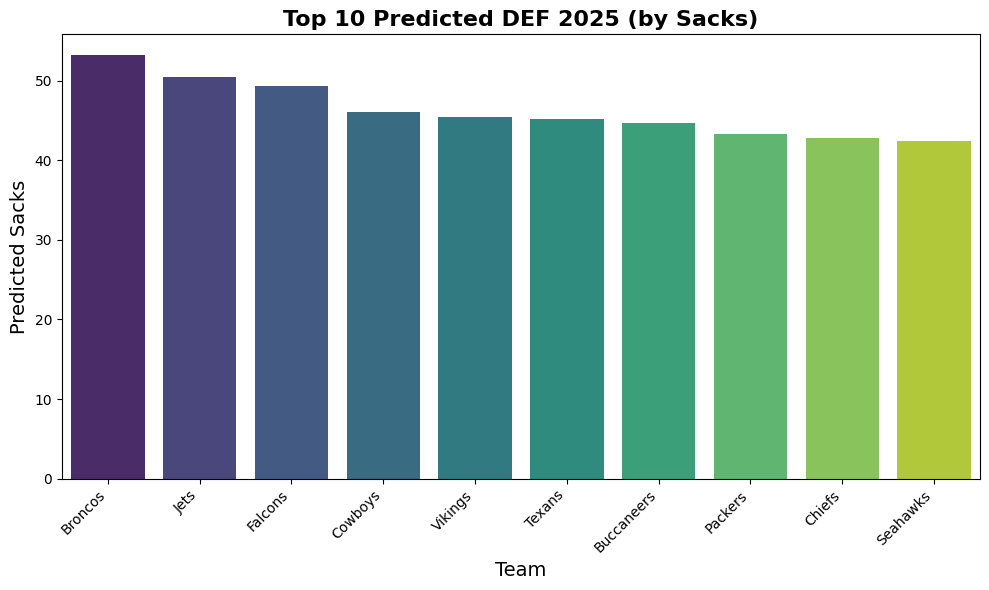

In [125]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Predicted Sacks', data=top_10_sck, hue='Team', palette='viridis', legend=False)

# Adding labels
plt.title('Top 10 Predicted DEF 2025 (by Sacks)', fontsize=16, weight='bold')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Predicted Sacks', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [126]:
# Predicting stats for Top 10 Defense via INTs
top_10_int = merged_def[['Team', 'Predicted INTs']].sort_values(by='Predicted INTs', ascending=False).head(10)

In [127]:
# Displaying the top 10
print(top_10_int[['Team', 'Predicted INTs']])

        Team  Predicted INTs
32   Vikings           19.79
30    Texans           17.60
29  Steelers           16.43
10     Colts           16.31
3      Bills           15.82
21   Packers           15.76
4    Broncos           14.58
2    Bengals           14.52
12   Cowboys           14.44
20     Lions           13.89


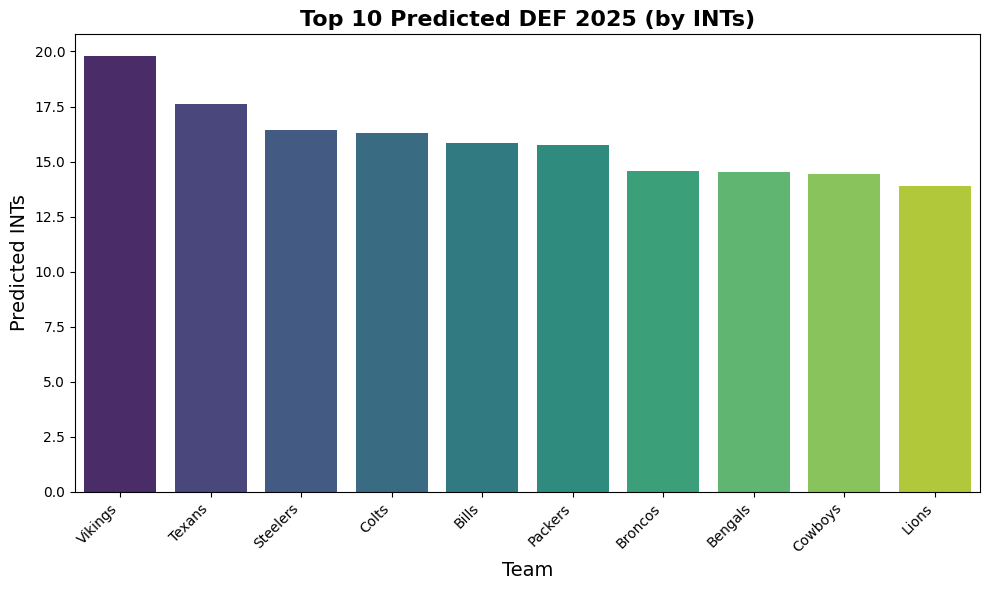

In [128]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Predicted INTs', data=top_10_int, hue='Team', palette='viridis', legend=False)

# Adding labels
plt.title('Top 10 Predicted DEF 2025 (by INTs)', fontsize=16, weight='bold')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Predicted INTs', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [129]:
# Predicting stats for Top 10 Defense via reception fumbles
top_10_frec = merged_def[['Team', 'Predicted Rec FUMs']].sort_values(by='Predicted Rec FUMs', ascending=False).head(10)

In [131]:
# Displaying the top 10
print(top_10_frec[['Team', 'Predicted Rec FUMs']])

          Team  Predicted Rec FUMs
3        Bills               14.11
29    Steelers               12.90
1        Bears               12.55
21     Packers               12.28
14      Eagles               11.80
8     Chargers               11.07
6   Buccaneers               11.04
17      Giants               10.47
12     Cowboys               10.33
9       Chiefs               10.22


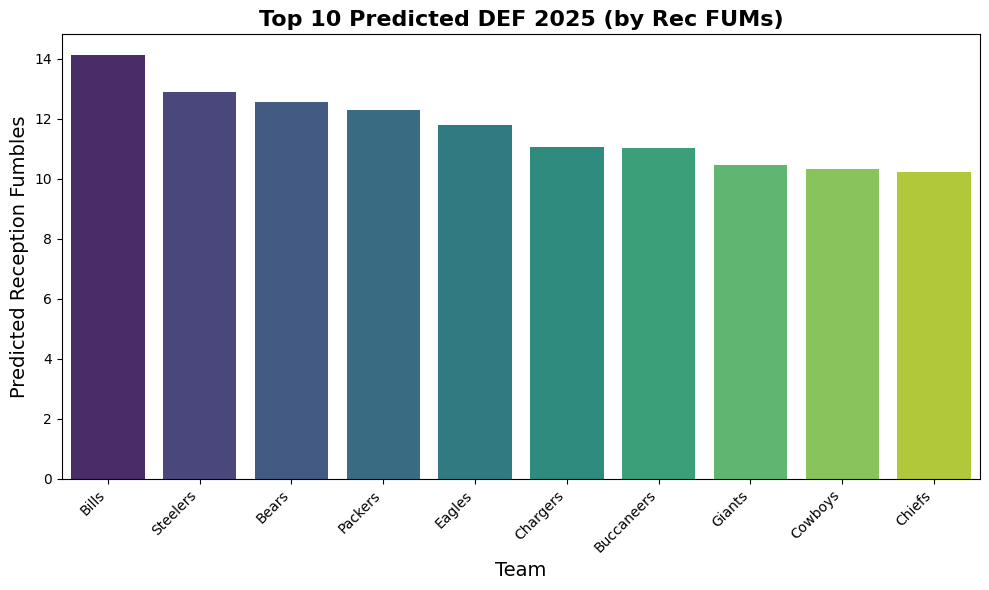

In [132]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Predicted Rec FUMs', data=top_10_frec, hue='Team', palette='viridis', legend=False)

# Adding labels
plt.title('Top 10 Predicted DEF 2025 (by Rec FUMs)', fontsize=16, weight='bold')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Predicted Reception Fumbles', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [133]:
# Predicting stats for Top 10 Defense via safties
top_10_sfty = merged_def[['Team', 'Predicted Safties']].sort_values(by='Predicted Safties', ascending=False).head(10)

In [134]:
# Displaying the top 10
print(top_10_sfty[['Team', 'Predicted Safties']])

          Team  Predicted Safties
4      Broncos               1.52
7    Cardinals               1.43
3        Bills               1.04
15     Falcons               1.03
19        Jets               0.98
25        Rams               0.96
30      Texans               0.93
28    Seahawks               0.88
6   Buccaneers               0.81
2      Bengals               0.73


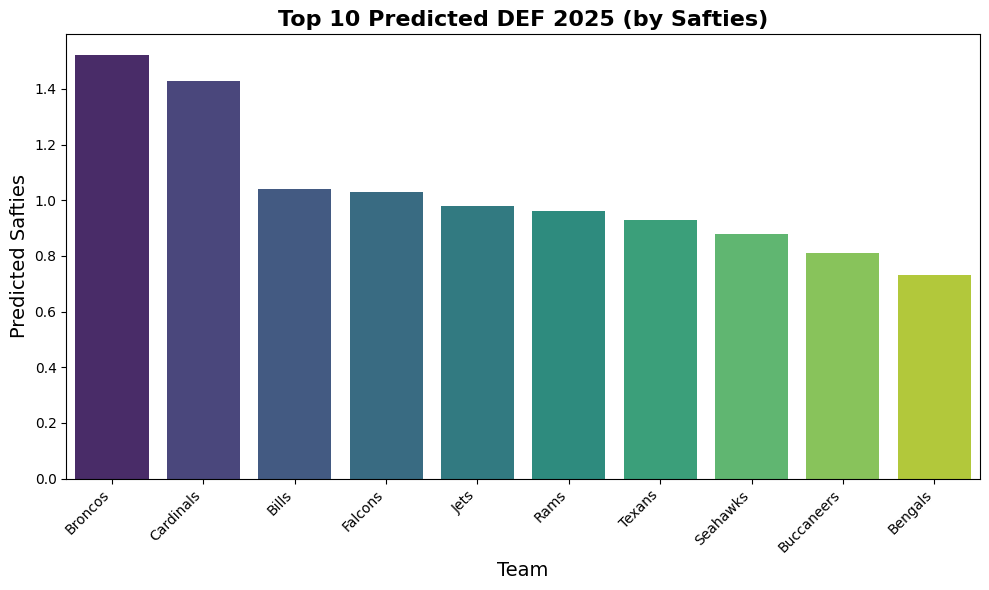

In [136]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Predicted Safties', data=top_10_sfty, hue='Team', palette='viridis', legend=False)

# Adding labels
plt.title('Top 10 Predicted DEF 2025 (by Safties)', fontsize=16, weight='bold')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Predicted Safties', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [138]:
# Predicting stats for Top 10 Defense via fumbles recovered for TDs
top_10_frtd = merged_def[['Team', 'Predicted FR TDs']].sort_values(by='Predicted FR TDs', ascending=False).head(10)

In [139]:
# Displaying the top 10
print(top_10_frtd[['Team', 'Predicted FR TDs']])

          Team  Predicted FR TDs
30      Texans              1.61
28    Seahawks              1.60
4      Broncos              1.38
19        Jets              1.38
32     Vikings              1.17
10       Colts              1.10
3        Bills              0.92
25        Rams              0.91
18     Jaguars              0.88
6   Buccaneers              0.88


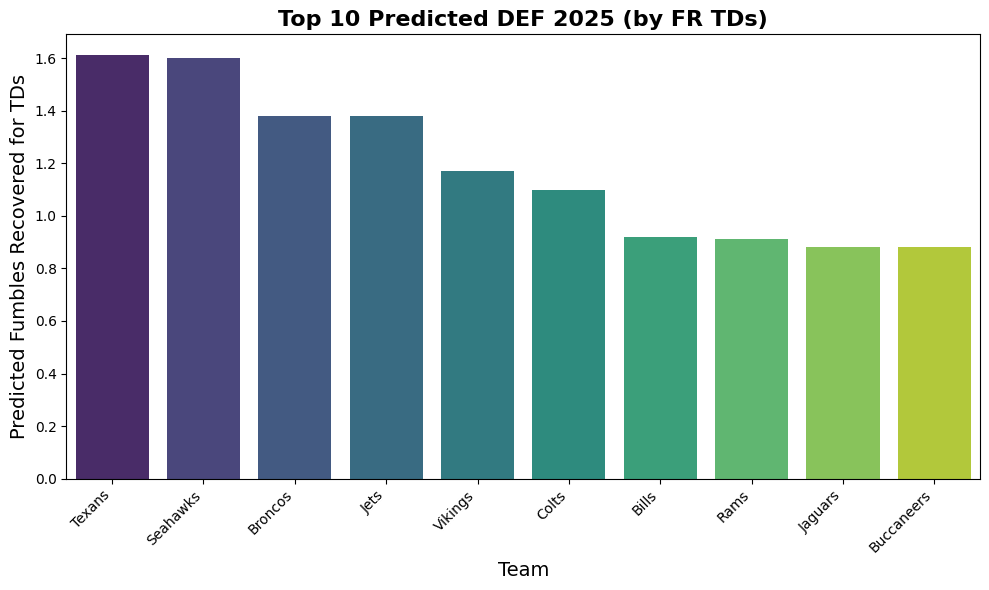

In [140]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Predicted FR TDs', data=top_10_frtd, hue='Team', palette='viridis', legend=False)

# Adding labels
plt.title('Top 10 Predicted DEF 2025 (by FR TDs)', fontsize=16, weight='bold')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Predicted Fumbles Recovered for TDs', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [141]:
# Predicting stats for Top 10 Defense via sacks
top_10_inttd = merged_def[['Team', 'Predicted INT TDs']].sort_values(by='Predicted INT TDs', ascending=False).head(10)

In [142]:
# Displaying the top 10
print(top_10_inttd[['Team', 'Predicted INT TDs']])

        Team  Predicted INT TDs
4    Broncos               2.26
25      Rams               1.86
3      Bills               1.64
28  Seahawks               1.50
2    Bengals               1.47
15   Falcons               1.46
32   Vikings               1.41
19      Jets               1.33
30    Texans               1.23
21   Packers               0.95


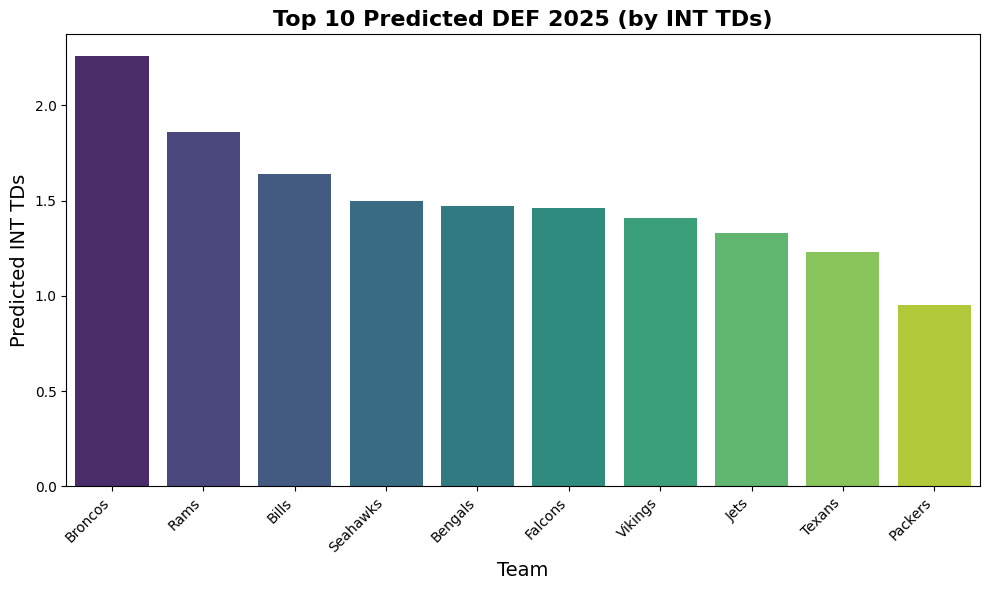

In [143]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Predicted INT TDs', data=top_10_inttd, hue='Team', palette='viridis', legend=False)

# Adding labels
plt.title('Top 10 Predicted DEF 2025 (by INT TDs)', fontsize=16, weight='bold')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Predicted INT TDs', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Loading in points against data

In [31]:
# Loading in PA datasets
pa_2021 = pd.read_csv('/content/Points Against - 2021.csv')
pa_2022 = pd.read_csv('/content/Points Against - 2022.csv')
pa_2023 = pd.read_csv('/content/Points Against - 2023.csv')
pa_2024 = pd.read_csv('/content/Points Against - 2024.csv')

In [34]:
# Merging datasets
merged_pa = pa_2021.merge(pa_2022, on='Team', how='outer', suffixes=('_2021', '_2022')) \
    .merge(pa_2023, on='Team', how='outer', suffixes=('', '_2023')) \
    .merge(pa_2024, on='Team', how='outer', suffixes=('', '_2024'))

In [35]:
merged_pa.head()

,Team,PA_2021,PA_2022,PA_2023,PA_2024
0,Arizona Cardinals,366,449,455,379
1,Atlanta Falcons,459,386,373,423
2,Baltimore Ravens,392,315,280,361
3,Buffalo Bills,289,286,311,368
4,Carolina Panthers,404,374,416,534


In [48]:
# Updating team names to match with merged_def dataframe
team_name_mapping = {
    'Arizona Cardinals': 'Cardinals',
    'Atlanta Falcons': 'Falcons',
    'Baltimore Ravens': 'Ravens',
    'Buffalo Bills': 'Bills',
    'Carolina Panthers': 'Panthers',
    'Chicago Bears': 'Bears',
    'Cincinnati Bengals': 'Bengals',
    'Cleveland Browns': 'Browns',
    'Dallas Cowboys': 'Cowboys',
    'Denver Broncos': 'Broncos',
    'Detroit Lions': 'Lions',
    'Green Bay Packers': 'Packers',
    'Houston Texans': 'Texans',
    'Indianapolis Colts': 'Colts',
    'Jacksonville Jaguars': 'Jaguars',
    'Kansas City Chiefs': 'Chiefs',
    'Las Vegas Raiders': 'Raiders',
    'Los Angeles Chargers': 'Chargers',
    'Los Angeles Rams': 'Rams',
    'Miami Dolphins': 'Dolphins',
    'Minnesota Vikings': 'Vikings',
    'New England Patriots': 'Patriots',
    'New Orleans Saints': 'Saints',
    'New York Giants': 'Giants',
    'New York Jets': 'Jets',
    'Philadelphia Eagles': 'Eagles',
    'Pittsburgh Steelers': 'Steelers',
    'San Francisco 49ers': '49ers',
    'Seattle Seahawks': 'Seahawks',
    'Tampa Bay Buccaneers': 'Buccaneers',
    'Tennessee Titans': 'Titans',
    'Washington Commanders': 'Commanders'
}

# Replacing team names in merged_pa
merged_pa['Team'] = merged_pa['Team'].replace(team_name_mapping)


In [45]:
# Calculating averages for points against
merged_pa.loc[:, 'Avg Pts Agst'] = merged_pa[['PA_2021',
                                          'PA_2022',
                                          'PA_2023',
                                          'PA_2024']].mean(axis=1)

In [46]:
merged_pa.head()

,Team,PA_2021,PA_2022,PA_2023,PA_2024,Avg Pts Agst
0,Cardinals,366,449,455,379,412.25
1,Falcons,459,386,373,423,410.25
2,Ravens,392,315,280,361,337.00
3,Bills,289,286,311,368,313.50
4,Panthers,404,374,416,534,432.00


In [146]:
# Assiging features (X) and target (y) for PA
features = ['Avg Pts Agst']
target_pa = ['PA_2024']

X_pa = merged_pa[features]
y_pa = merged_pa[target_pa]

In [147]:
# Splitting the data 80/20
X_train_pa, X_test_pa, y_train_pa, y_test_pa = train_test_split(X_pa, y_pa, test_size=0.2, random_state=42)

In [148]:
# Initializing RFR model
rf_pa = RandomForestRegressor(n_estimators=100, random_state=42)

In [149]:
# Training the model
rf_pa.fit(X_train_pa, y_train_pa.values.reshape(-1,))

RandomForestRegressor(random_state=42)

In [150]:
# Predicting on 2024 data
y_pred_pa = rf_pa.predict(X_test_pa)

In [152]:
# Evaluating the model
print("Mean Absolute Error:", mean_absolute_error(y_test_pa, y_pred_pa))
print("R2 Score:", r2_score(y_test_pa, y_pred_pa))

Mean Absolute Error: 63.301428571428566
R2 Score: -0.2738490932926583


In [153]:
# Predicting stats for 2025
merged_pa.loc[:, 'Predicted Pts Agst'] = rf_pa.predict(X_pa)

In [154]:
# Predicting stats for top 10 lowest points against DEF 2025
top_10_pa = merged_pa[['Team', 'Predicted Pts Agst']].sort_values(by='Predicted Pts Agst', ascending=True).head(10)

In [155]:
# Displaying the data
print(top_10_pa[['Team', 'Predicted Pts Agst']])

          Team  Predicted Pts Agst
25      Eagles              340.17
29  Buccaneers              348.23
8      Cowboys              350.51
11     Packers              352.94
20     Vikings              357.06
26    Steelers              360.39
30      Titans              361.10
17    Chargers              361.10
28    Seahawks              365.12
19    Dolphins              373.00


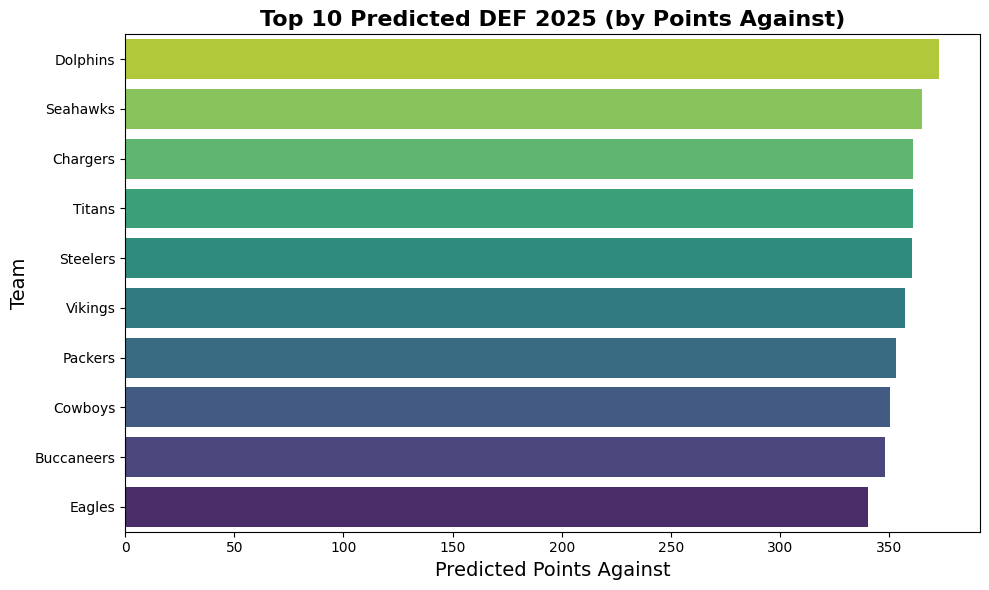

In [159]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Predicted Pts Agst', y='Team', data=top_10_pa, hue='Team', palette='viridis', legend=False)
plt.title('Top 10 Predicted DEF 2025 (by Points Against)', fontsize=16, weight='bold')
plt.xlabel('Predicted Points Against', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Forecasting total fantasy football points for defenses of 2025

Defense Fantasy Football Calculation:

* Sacks: 1 point
* Interceptions: 2 points
* Fumbles Recovered: 2 points
* Safeties: 2 points
* Defensive Touchdowns: 6 points
* Points Allowed (0): 10 points
* Points Allowed (1-6): 7 points
* Points Allowed (7-13): 4 points
* Points Allowed (14-20): 1 points
* Points Allowed (21-27): 0 points
* Points Allowed (28-34): -1 points
* Points Allowed (35+): -4 points

***This does not account for kick/punt return rouchdowns or two point conversions***

In [163]:
# Calulating total fantasy football points for merged_def
merged_def['Fantasy Pts Sacks'] = merged_def['Predicted Sacks'] * 1
merged_def['Fantasy Pts INTs'] = merged_def['Predicted INTs'] * 2
merged_def['Fantasy Pts Rec FUMs'] = merged_def['Predicted Rec FUMs'] * 2
merged_def['Fantasy Pts Sfty'] = merged_def['Predicted Safties'] * 2
merged_def['Fantasy Pts FR TDs'] = (merged_def['Predicted FR TDs'] * 6) + 2
merged_def['Fantasy Pts INT TDs'] = merged_def['Predicted INT TDs'] * 6

In [161]:
# Calculating fantasy value for predicted points allowed

def calculate_fantasy_points_allowed(points_allowed):
    if points_allowed == 0:
        return 10
    elif 1 <= points_allowed <= 6:
        return 7
    elif 7 <= points_allowed <= 13:
        return 4
    elif 14 <= points_allowed <= 20:
        return 1
    elif 21 <= points_allowed <= 27:
        return 0
    elif 28 <= points_allowed <= 34:
        return -1
    elif points_allowed >= 35:
        return -4
    else:
        return 0

merged_pa['Fantasy Pts Agst'] = (merged_pa['Predicted Pts Agst'] / 17).apply(calculate_fantasy_points_allowed)

In [165]:
# Calculating total fantasy points 2025
merged_def['Total Fantasy Points 2025'] = merged_def['Fantasy Pts Sacks'] + merged_def['Fantasy Pts INTs'] + merged_def['Fantasy Pts Rec FUMs'] + merged_def['Fantasy Pts Sfty'] + merged_def['Fantasy Pts FR TDs'] + merged_def['Fantasy Pts INT TDs'] + merged_pa['Fantasy Pts Agst']

In [166]:
# Predicting top 10 fantasy defenses of 2025
top_10_fantasy = merged_def[['Team', 'Total Fantasy Points 2025']].sort_values(by='Total Fantasy Points 2025', ascending=False).head(10)

In [167]:
# Displaying the top 10
print(top_10_fantasy[['Team', 'Total Fantasy Points 2025']])

        Team  Total Fantasy Points 2025
4    Broncos                     126.63
3      Bills                     120.97
30    Texans                     120.68
29  Steelers                     108.20
21   Packers                     108.10
12   Cowboys                     105.75
10     Colts                     102.09
25      Rams                      99.07
19      Jets                      99.00
14    Eagles                      98.61


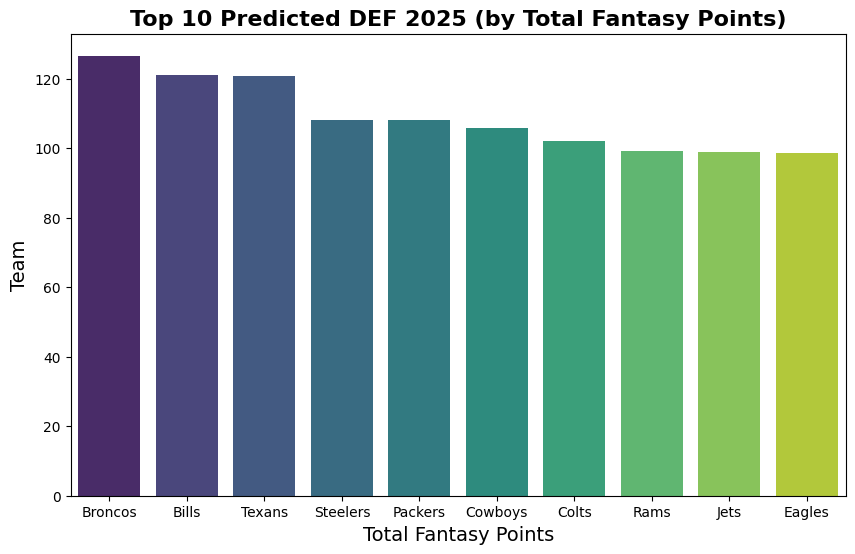

In [169]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Total Fantasy Points 2025', data=top_10_fantasy, hue='Team', palette='viridis', legend=False)

plt.title('Top 10 Predicted DEF 2025 (by Total Fantasy Points)', fontsize=16, weight='bold')
plt.xlabel('Total Fantasy Points', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.show()